Analyse GDP_Life_Expectancy

INTRODUCTION

The World Health Organization and the World Bank are trying to identify the relationship between the GDP and life expectancy, in order to eliminate poverty and increase the length and quality of life.  

In this project, data from  six countries will be analysed, in order to provide workable suggestions!

Here are a few questions that this project will seek to answer:

Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?
What is the distribution of that life expectancy?


In [4]:
# import modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
# load the datasets and inspect them.

In [6]:
gdp_life = pd.read_csv('all_data.csv', delimiter = ',')
gdp_life.head(2)
#gdp_life.tail(2)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10


In [7]:
#check out the shape of gdp_life
gdp_life.shape

(96, 4)

In [8]:
#check out how many countries
gdp_life['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [9]:
#check out how many years
gdp_life['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
# Rename Column "Life expectancy at birth (years)" to new "Life"
gdp_life.rename(columns = {'Life expectancy at birth (years)': 'Life'}, inplace=True)
gdp_life.head(2)

,Country,Year,Life,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10


In [11]:
# Create a subset of 3 wealthy nations: USA, China, Germany
rich_gdp_life = gdp_life[gdp_life.Country.isin(['United States of America', 'China', 'Germany'])]

# Create a subset of 3 developing nations: Mexico, Chile and Zimbabwe
poor_gdp_life = gdp_life[gdp_life.Country.isin(['Mexico', 'Chile', 'Zimbabwe'])]

In [12]:
## Create subset for every country:
china_gdp_life = gdp_life[gdp_life.Country.isin(['China'])]
chile_gdp_life = gdp_life[gdp_life.Country.isin(['Chile'])]
germany_gdp_life = gdp_life[gdp_life.Country.isin(['Germany'])]
mexico_gdp_life = gdp_life[gdp_life.Country.isin(['Mexico'])]
usa_gdp_life = gdp_life[gdp_life.Country.isin(['United States of America'])]
z_gdp_life = gdp_life[gdp_life.Country.isin(['Zimbabwe'])]


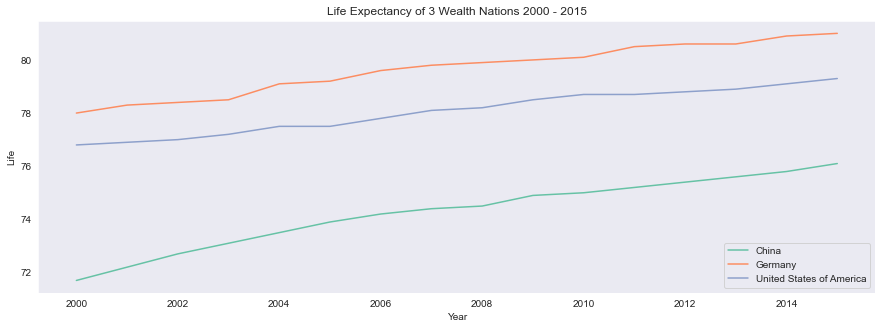

In [27]:
#  Create line charts to analyse if life expectancy has increased over time for the 3 wealthy nations:
sns.set_palette("Set2")
plt.figure(figsize = (15, 5))
#sns.set_style("whitegrid")
sns.set_style("darkgrid")

#sns.set_style("whitegrid" 'grid.linestyle' '--' )
plt.grid()
sns.lineplot(data = rich_gdp_life, x= 'Year', y='Life', hue='Country') 

plt.legend(loc = 4)
plt.title("Life Expectancy of 3 Wealth Nations 2000 - 2015")
plt.show()


Findings from the line chart "Life Expectancy of 3 Wealth Nations 2000 - 2015":

- 3 wealthy nations' life expectancy all increased during 2000 to 2015, 
- Germany(Orange Bar) leading,  followed by USA and China.

In [14]:
#The violin plot of the life expectancy distribution by country

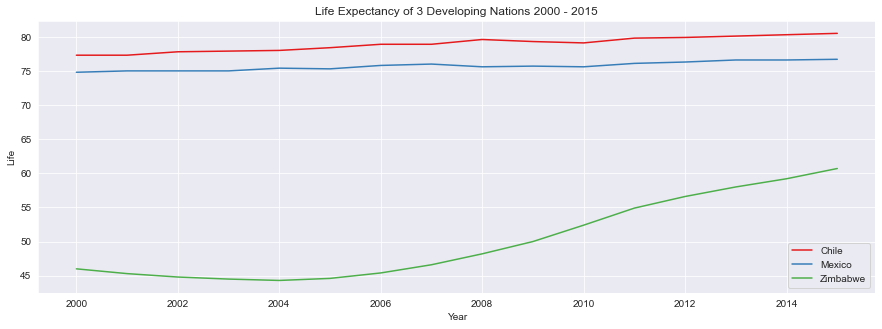

In [30]:
#  Create line charts to analyse if life expectancy has increased over time for the 3 developing nations:
sns.set_palette("Set1")
plt.figure(figsize = (15, 5))
#sns.set_style("darkgrid")
sns.lineplot(data= poor_gdp_life, x='Year', y='Life', hue='Country') 
plt.legend(loc = 4)
plt.title("Life Expectancy of 3 Developing Nations 2000 - 2015")
plt.show()


Findings from the line chart "Life Expectancy of 3 Developing Nations 2000 - 2015":

- 3 developing nations' life expectancy all increased during 2000 to 2015, leading by Chile and followed by Mexico;
- The biggest winner is Zimbabwe (green), its life expectancy has increased significantly from 2004 to 2015, from 45 years old to almost 60 years old.

In [16]:
# the average life expectancy and GDP in these 6 nations

mean_GDP_life = gdp_life.drop('Year', axis = 1).groupby("Country").mean().reset_index().sort_values(by="Life", ascending=False)

#dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
#avg_life = gdp_life.groupby(["Country"])['Life'].mean().reset_index().sort_values(by='Life', ascending=False)

# rename 'Life' to 'Life Expectancy - Average'
mean_GDP_life.rename(columns = {'Life': 'Life Expectancy-Average'}, inplace=True)
mean_GDP_life


,Country,Life Expectancy-Average,GDP
2,Germany,79.65625,3.094776e+12
0,Chile,78.94375,1.697888e+11
4,United States of America,78.06250,1.407500e+13
3,Mexico,75.71875,9.766506e+11
1,China,74.26250,4.957714e+12
5,Zimbabwe,50.09375,9.062580e+09


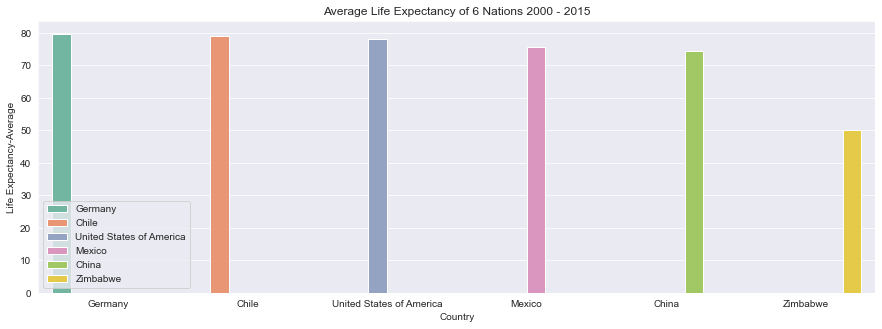

<Figure size 432x288 with 0 Axes>

In [17]:
#  Create bar charts to show the Average Life Expectancy by Country
sns.set_palette("Set2")
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
sns.barplot(data= mean_GDP_life, x='Country', y='Life Expectancy-Average', hue='Country') 
plt.legend(loc =3)
plt.title("Average Life Expectancy of 6 Nations 2000 - 2015")
plt.show()
plt.clf()

In [18]:
# the median life expectancy and GDP in these 6 nations

median_GDP_life = gdp_life.drop('Year', axis = 1).groupby("Country").median().reset_index().sort_values(by="GDP", ascending=False)

#dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
#avg_life = gdp_life.groupby(["Country"])['Life'].mean().reset_index().sort_values(by='Life', ascending=False)

# rename 'Life' to 'Life Expectancy-Median'
median_GDP_life.rename(columns = {'Life': 'Life Expectancy-Median'}, inplace=True)
median_GDP_life


,Country,Life Expectancy-Median,GDP
4,United States of America,78.15,1.445000e+13
1,China,74.45,4.075195e+12
2,Germany,79.85,3.396350e+12
3,Mexico,75.65,1.004376e+12
0,Chile,79.00,1.729975e+11
5,Zimbabwe,47.40,6.733671e+09


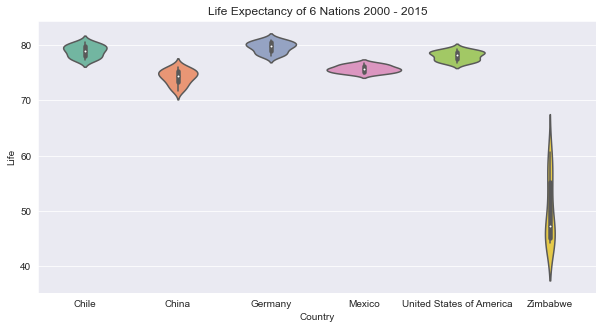

<Figure size 432x288 with 0 Axes>

In [19]:
# The violin plot of the life expectancy distribution by country

sns.set_palette("Set2")
plt.figure(figsize = (10, 5))
sns.set_style("darkgrid")

plt.title("Life Expectancy of 6 Nations 2000 - 2015")

sns.violinplot(data = gdp_life, x = 'Country', y = 'Life')
plt.show()
plt.clf()


- the majority of the life expectancy distribution is around median for those 6 countries during 2000 - 2015;
- 5 out of the 6 nations, except Zimbabwe, the averge life expectancy is very similar to its median life expectancy;
- With Zimbabwe, there are 3 years difference between its average life expectancy(50), and mean life expectancy (47);
- the life expectancy range of those 5 countries(except Zimbabwe) is around 5 years, while Zimbabwe could range almost over 20 years.  


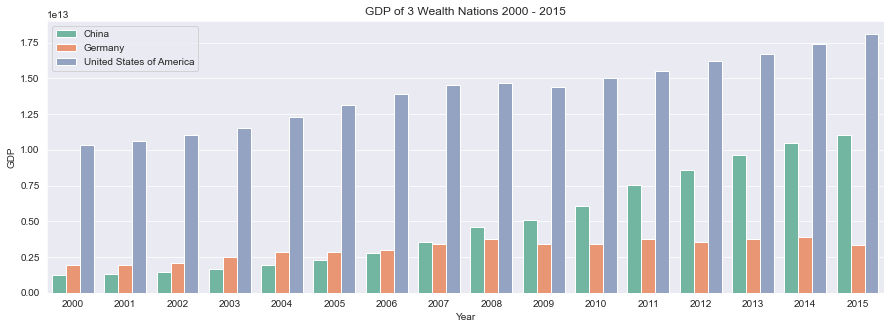

In [20]:
#  Create bar charts to analyse if GDP has increased over time for the 3 wealthy nations:
sns.set_palette("Set2")
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
sns.barplot(data= rich_gdp_life, x='Year', y='GDP', hue='Country') 
plt.legend(loc =2)
plt.title("GDP of 3 Wealth Nations 2000 - 2015")
plt.show()

Findings from the bar chart "GDP of 3 Wealth Nations 2000 - 2015":

-  Both US and Germany's GDP have increased during 2000 - 2015, although there were slight volatility during the period;
-  China was the biggest winner,its GDP increased significantly, more than trippled during 2000 to 2015.   

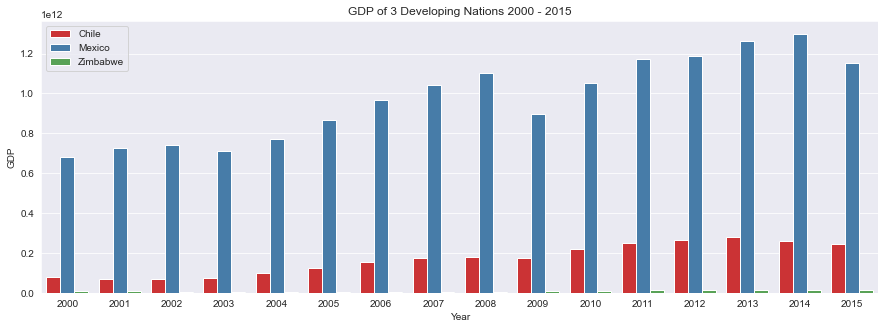

In [21]:
#  Create bar charts to analyse if GDP has increased over time for the 3 developing nations:
sns.set_palette("Set1")
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
sns.barplot(data= poor_gdp_life, x='Year', y='GDP', hue='Country') 
plt.legend(loc =2)
plt.title("GDP of 3 Developing Nations 2000 - 2015")
plt.show()

Findings from the bar chart "GDP of 3 Developing Nations 2000 - 2015":

-  Both Mexico and Chile's GDP have increased during 2000 - 2015, although there were slight volatility during the period;
-  It is hard analysis Zimbabwe' GDP, however, the country has the largest increase in life expectancy, a sperate bar chart needs to be created.

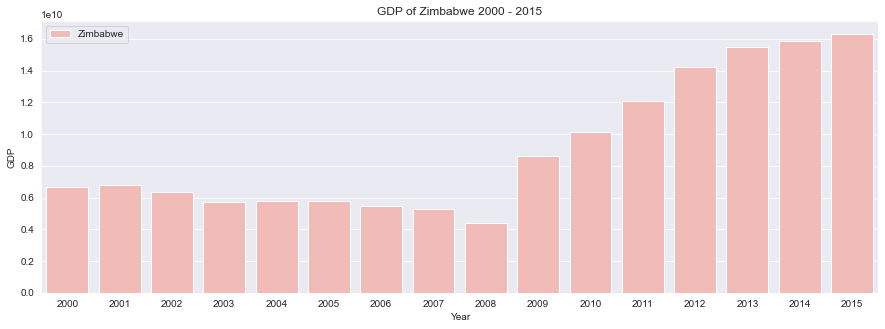

In [22]:
#  Create bar charts to analyse if GDP has increased over time for Zimbabwe:
# Create subset for Zimbabwe
z_gdp_life = gdp_life[gdp_life.Country.isin(['Zimbabwe'])]

sns.set_palette("Pastel1")
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
sns.barplot(data= z_gdp_life, x='Year', y='GDP', hue='Country') 
plt.legend(loc =2)
plt.title("GDP of Zimbabwe 2000 - 2015")
plt.show()

Findings from the bar chart "GDP of Zimbabwe 2000 - 2015":

-  Zimbabwe has enjoyed a strong growth of GDP from 2008 to 2015;
-  Maybe it is one of the main reasons behind its life expectancy growth druing the same period.


In [23]:
# the average GDP & life expectancy in these 6 nations

mean_GDP_life = gdp_life.drop('Year', axis = 1).groupby("Country").mean().reset_index().sort_values(by="GDP", ascending=False)
print(mean_GDP_life)

                    Country      Life           GDP
4  United States of America  78.06250  1.407500e+13
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
0                     Chile  78.94375  1.697888e+11
5                  Zimbabwe  50.09375  9.062580e+09


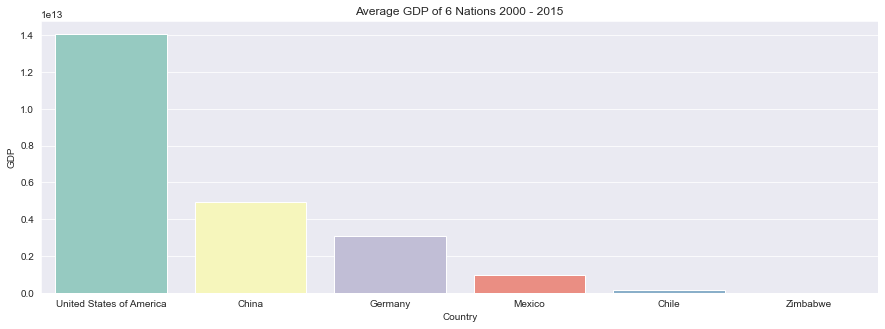

<Figure size 432x288 with 0 Axes>

In [24]:
#  Create bar charts to show the Average GDP by Country
sns.set_palette("Set3")
plt.figure(figsize = (15, 5))
sns.set_style("darkgrid")
sns.barplot(data= mean_GDP_life, x='Country', y='GDP') 
#plt.legend(loc =3)
plt.title("Average GDP of 6 Nations 2000 - 2015")
plt.show()
plt.clf()

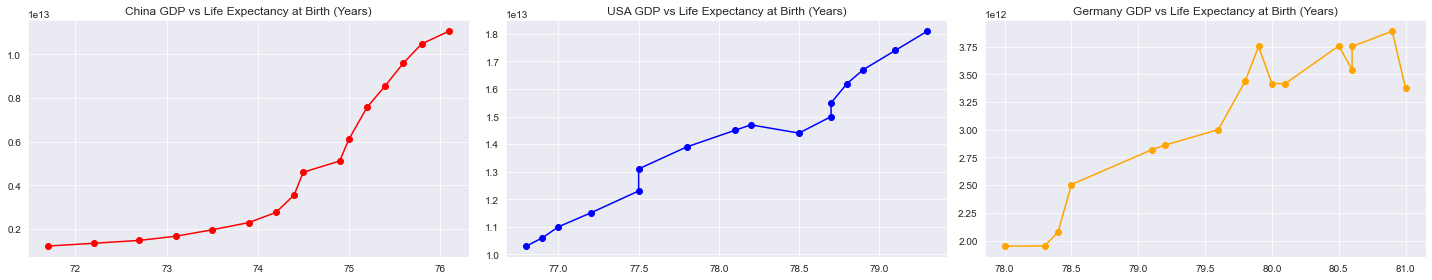

<Figure size 432x288 with 0 Axes>

In [25]:
#Create Scatter Plots to show if there is any correlation between GDP and life expectancy of a country

# China, USA and Germany
y1 = china_gdp_life['GDP']
y2 = usa_gdp_life['GDP']
y3 = germany_gdp_life['GDP']


x1 = china_gdp_life['Life']
x2 = usa_gdp_life['Life']
x3 = germany_gdp_life['Life']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

# Left plot China
axes[0].plot(x1, y1, color = 'red', marker = 'o')
axes[0].set_title("China GDP vs Life Expectancy at Birth (Years)")

# Middle Plot USA
axes[1].plot(x2, y2, color = 'blue', marker = 'o')
axes[1].set_title(("USA GDP vs Life Expectancy at Birth (Years)"))

# Right Plot Germany
axes[2].plot(x3, y3, color = 'orange', marker = 'o')
axes[2].set_title("Germany GDP vs Life Expectancy at Birth (Years)")

plt.subplots_adjust(hspace=.5)
fig.tight_layout()
plt.show()
plt.clf()                
                  

The above Scatter Plots have shown, that wealthy nations like China, USA and Germany,  there is a positive correlation between GDP and life expectancy of a country, as the GDP increases, the life expectancy also increases over the years.

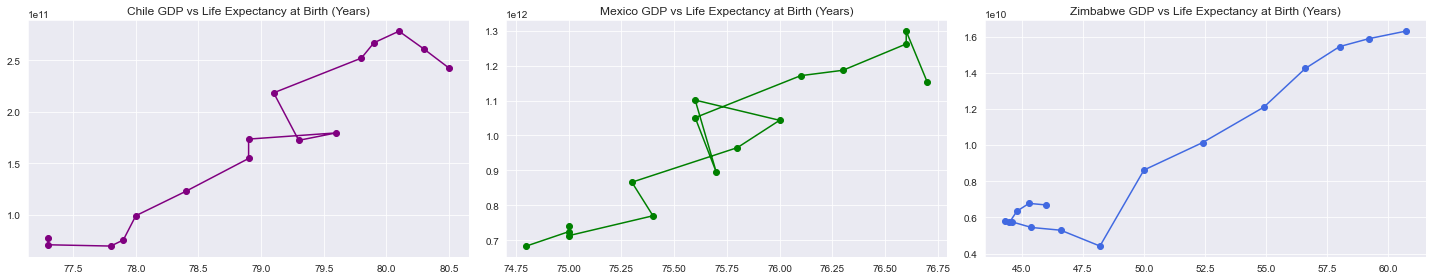

<Figure size 432x288 with 0 Axes>

In [26]:
# GDP vs Life Expectancy: Chille, Mexico and Zimbabwe

y1 = chile_gdp_life['GDP']
y2 = mexico_gdp_life['GDP']
y3 = z_gdp_life['GDP']


x1 = chile_gdp_life['Life']
x2 = mexico_gdp_life['Life']
x3 = z_gdp_life['Life']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

# Left plot Chille
axes[0].plot(x1, y1, color = 'purple', marker = 'o')
axes[0].set_title("Chile GDP vs Life Expectancy at Birth (Years)")

# Middle Plot Mexico
axes[1].plot(x2, y2, color = 'green', marker = 'o')
axes[1].set_title(("Mexico GDP vs Life Expectancy at Birth (Years)"))

# Right Plot Zimbabwe
axes[2].plot(x3, y3, color = 'royalblue', marker = 'o')
axes[2].set_title("Zimbabwe GDP vs Life Expectancy at Birth (Years)")

plt.subplots_adjust(hspace=.5)
fig.tight_layout()
plt.show()
plt.clf()          

The above Scatter Plots have shown, that developing nations like Chile, Mexico and Zimbabwe,  there is also a positive correlation between GDP and life expectancy of a country, as the GDP increases, the life expectancy also increases over the years.

Conclusion:
- Whether it is a developing or developed nation, as GDP increases, the life expectancy also increases;
- The result is even more significant for poor nation like Zimbabwe, as the country's GDP increases, its life expectancy also increases significantly over the years;

Suggestions to increase developing nations' GDP:
- Most developing nations are in Africa, we need to utilize its natural resources, especially solar power, eg to install millions of solar panels in Africa, the solar grid can then be exported to Europe and around the world, to provide clean solar energy;
-  By developing solar energy, developing nations in Africa can not only increase its GDP, but also play a vital role in creating green energy for the world. 
-  A true Win - Win strategy.

4th Feb 2021 by Judy Ping McCormick - Melbourne - Home to Australian Open Tennis